[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)

## L4:  Llevando a la práctica lo aprendido.

El objetivo de este notebook es mostrar cómo construir un modelo de regresión lineal y su evaluación con las métricas seleccionadas. Se explicará, paso a paso, como:
1. Preparar los datos para el modelado.
2. Construir el modelo de regresión lineal.
3. Evaluar el modelo.
4. Interpretar el modelo.

Se utiliza el conjunto de datos del notebook del módulo 1, relacionado con ventas de vehículos .

Además, puedes utilizar este notebook como guía para la solución de los problemas que se propongan en los ejercicios prácticos y para el proyecto.

###### Autores: David Ocampo (d.ocampo@uniandes.edu.co), Julián Montoya (jc.montoyar@uniandes.edu.co)

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MODELOS PREDICTIVOS CON ML PYTHON ejercicios\1. Ejercicio regresión vehículos\Vehiculos_Dataset.csv',sep=';')

In [3]:
# Cantidad de datos y número de variables
data.shape

(8115, 9)

In [4]:
# Mostrar los datos
data.head()

referencia  modelo  precio  kilometraje combustible  \
0        Maruti Swift Dzire VDI    2014  450000       145500      Diesel   
1  Skoda Rapid 1.5 TDI Ambition    2014  370000       120000      Diesel   
2      Honda City 2017-2020 EXi    2006  158000       140000      Petrol   
3     Hyundai i20 Sportz Diesel    2010  225000       127000      Diesel   
4        Maruti Swift VXI BSIII    2007  130000       120000      Petrol   

    propietario   motor  poder_maximo  asientos  
0   First Owner  1248.0         74.00       5.0  
1  Second Owner  1498.0        103.52       5.0  
2   Third Owner  1497.0         78.00       5.0  
3   First Owner  1396.0         90.00       5.0  
4   First Owner  1298.0         88.20       5.0

### 3. Preparación de los datos

Antes de realizar cualquier paso de preparación de datos es importante asegurar que estos no contienen errores, como datos faltantes (missing) o duplicados. La exploración realizada en el notebook del módulo 1 evidenció que algunos registros no tienen valores para algunas variables. Es necesario tratar estas ausencias ya que, en general, los algoritmos de aprendizaje no son robustos ante ellas. 

In [5]:
# Es recomendable que todos los pasos preparación se realicen sobre otro archivo.
data_t = data

In [6]:
# Podemos comprobar las ausencias con esta línea de código. 
data_t.isna().sum()/len(data_t)

referencia      0.000000
modelo          0.000000
precio          0.000000
kilometraje     0.000000
combustible     0.000000
propietario     0.000000
motor           0.027234
poder_maximo    0.027357
asientos        0.027234
dtype: float64

Aproximadamante un 2% del total de los datos tienen ausencias. Dado el bajo porcentaje se puede realizar la eliminación de estos registros.

In [7]:
# Eliminación de registros con ausencias. 
data_t=data_t.dropna()

In [8]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data_t.shape

(7893, 9)

También la exploración mostró que existen registros duplicados. Es conveniente también eliminar estos del conjunto de datos. 

In [9]:
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

In [10]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data_t.shape

(6707, 9)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje. Cada uno de estos puede trabajar con un tipo de variable. Por ejemplo, para el algoritmo de regresión lineal todas las variables en el conjunto de datos deben ser numéricas. ¿Que pasa si en el conjunto de datos hay variables categóricas? Pues que se debe realizar una transformación de estas variables a un formato numérico.

Esta tranformación se puede realizar de dos formas: asignado un número a cada categoría o representado cada categoría como una variable binaria. Esta útima transformación se conoce como 1-de-n y construye lo que se conoce como variables dummies. En general, es la más recomendada ya que no genera una relación de orden entre las categorías.

Esta numerización es la que se aplica a la variable "nombre_categoria_producto" la cual, a su vez, nos permitirá establecer la influencia de cada categoría en la variable objetivo.

In [11]:
# Se muestran las categorías de la variable "propietario" con sus frecuencias
pd.value_counts(data['propietario'])

First Owner             5281
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Name: propietario, dtype: int64

In [12]:
# Se muestran las categorías de la variable "combustible" con sus frecuencias
pd.value_counts(data['combustible'])

Diesel    4394
Petrol    3626
CNG         57
LPG         38
Name: combustible, dtype: int64

In [13]:
# Se realiza la transformación de estas variables a dummies.
data_t = pd.get_dummies(data_t, columns=['combustible','propietario'])

In [14]:
# Cantidad de datos y número de variables después de esta transformación.
data_t.shape

(6707, 15)

In [15]:
# Ahora el conjunto de datos tiene 14 variables.Veamos las primeras filas de este nuevo conjunto de datos.
data_t.head()

referencia  modelo  precio  kilometraje   motor  \
0        Maruti Swift Dzire VDI    2014  450000       145500  1248.0   
1  Skoda Rapid 1.5 TDI Ambition    2014  370000       120000  1498.0   
2      Honda City 2017-2020 EXi    2006  158000       140000  1497.0   
3     Hyundai i20 Sportz Diesel    2010  225000       127000  1396.0   
4        Maruti Swift VXI BSIII    2007  130000       120000  1298.0   

   poder_maximo  asientos  combustible_CNG  combustible_Diesel  \
0         74.00       5.0                0                   1   
1        103.52       5.0                0                   1   
2         78.00       5.0                0                   0   
3         90.00       5.0                0                   1   
4         88.20       5.0                0                   0   

   combustible_LPG  combustible_Petrol  propietario_First Owner  \
0                0                   0                        1   
1                0                   0                        0   
2                0                   1                        0   
3                0                   0                        1   
4                0                   1                        1   

   propietario_Fourth & Above Owner  propietario_Second Owner  \
0                                 0                         0   
1                                 0                         1   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   propietario_Third Owner  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0

Otro aspecto a que debemos considerar es la eliminación de variables que no aportan a la solución. Por ejemplo, identificadores como "referencia" no son informativos. Es importante que las eliminemos del conjunto de datos ya que pueden afectar el rendimiento de los modelos generados.

In [16]:
# Eliminación del indentoficador de fila.
data_t=data_t.drop(['referencia'], axis=1)

Con los datos preparados ya podemos construir nuestro modelo de regresión lineal.

### 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. En este caso, nuestra variable objetivo es el precio.

In [17]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data_t['precio']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['precio'], axis=1)

In [18]:
# Mostramos nuestros datos
X.head()

modelo  kilometraje   motor  poder_maximo  asientos  combustible_CNG  \
0    2014       145500  1248.0         74.00       5.0                0   
1    2014       120000  1498.0        103.52       5.0                0   
2    2006       140000  1497.0         78.00       5.0                0   
3    2010       127000  1396.0         90.00       5.0                0   
4    2007       120000  1298.0         88.20       5.0                0   

   combustible_Diesel  combustible_LPG  combustible_Petrol  \
0                   1                0                   0   
1                   1                0                   0   
2                   0                0                   1   
3                   1                0                   0   
4                   0                0                   1   

   propietario_First Owner  propietario_Fourth & Above Owner  \
0                        1                                 0   
1                        0                                 0   
2                        0                                 0   
3                        1                                 0   
4                        1                                 0   

   propietario_Second Owner  propietario_Third Owner  
0                         0                        0  
1                         1                        0  
2                         0                        1  
3                         0                        0  
4                         0                        0

In [19]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: precio, dtype: int64

A continuación debemos hacer la separación de nuestros datos en un conjunto para el entrenamiento y otro para el test. Recuerda que esta división nos permitirá determinar el rendimiento de generalización del modelo sobre nuevos datos.

El conjunto de entrenamiento se utiliza para ajustar (entrenar) un modelo. Luego, se utiliza el conjunto test para hacer predicciones, las cuales se comparan con los valores esperados para determinar su rendimiento utilizando la métrica seleccionada. 

1. **Train data:** se utiliza para entrenar el modelo con el algoritmo de aprendizaje.
2. **Test data:** se utiliza para evaluar el ajuste del modelo.

In [20]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

Antes de construir el modelo debemos crear un objeto de la clase LinearRegression.

In [21]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

A continuación, procedemos a entrenar el modelo utilizando el conjunto de entrenamiento.

In [22]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

### 5. Evaluación del modelo
Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [23]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 300277.30
MAE: 167214.45
R²: 0.61


In [24]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 278458.18
MAE: 167864.62
R²: 0.61


Una vez determinado el rendimiento de generalización utilizando el conjunto test podemos tomar todos los datos y construir el modelo final.

In [25]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [26]:
# Podemos visualizar los parámetros del modelos (coeficientes de regresión)
modelo_regresion.coef_

array([ 3.62695288e+04, -7.61873171e-01,  9.27163759e+01,  8.66617328e+03,
       -2.14249124e+04, -3.83281066e+04,  1.29411363e+04,  8.02835753e+04,
       -5.48966050e+04,  4.53885517e+04, -2.16000787e+03, -1.91631672e+04,
       -2.40653767e+04])

### 6. Interpretación del modelo
También podemos sacar un reporte que nos va a permitir analizar estadísticos del modelo.

In [27]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     961.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:52:37   Log-Likelihood:                -94012.
No. Observations:                6707   AIC:                         1.880e+05
Df Residuals:                    6695   BIC:                         1.881e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
modelo                            3.627e+04   1174.215     30.888      0.000     3.4e+04    3.86e+04
kilometraje                         -0.7619      0.072    -10.601      0.000      -0.903      -0.621
motor                               92.7164     15.273      6.071      0.000      62.776     122.657
poder_maximo                      8666.1733    177.429     48.843      0.000    8318.356    9013.991
asientos                         -2.142e+04   5291.850     -4.049      0.000   -3.18e+04   -1.11e+04
combustible_CNG                  -3.666e+07   1.18e+06    -30.987      0.000    -3.9e+07   -3.43e+07
combustible_Diesel               -3.661e+07   1.18e+06    -30.993      0.000   -3.89e+07   -3.43e+07
combustible_LPG                  -3.654e+07   1.18e+06    -30.999      0.000   -3.88e+07   -3.42e+07
combustible_Petrol               -3.667e+07   1.18e+06    -31.091      0.000    -3.9e+07   -3.44e+07
propietario_First Owner          -3.657e+07   1.18e+06    -30.895      0.000   -3.89e+07   -3.43e+07
propietario_Fourth & Above Owner -3.662e+07   1.18e+06    -31.102      0.000   -3.89e+07   -3.43e+07
propietario_Second Owner         -3.664e+07   1.18e+06    -31.026      0.000    -3.9e+07   -3.43e+07
propietario_Third Owner          -3.664e+07   1.18e+06    -31.076      0.000    -3.9e+07   -3.43e+07
==============================================================================
Omnibus:                     6786.844   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           688032.863
Skew:                           4.788   Prob(JB):                         0.00
Kurtosis:                      51.686   Cond. No.                     1.28e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 7. Almacenamiento  del modelo.
Puedes guardar tu modelo para que lo puedas recuperar cuando lo desees o llevarlo a producción.

In [28]:
# Una forma de guardar el modelo es a través de la funcionalidad joblib.
import joblib

In [29]:
# Ahora guardamos el modelo con el nombre que selecciones.
joblib.dump(modelo_regresion, 'ModeloRegresion.joblib')
# Si lo quieres recuperar más tarde puedes utilizar la siguiente instrucción:
# modelo = load('ModeloRegresion.joblib') 

['ModeloRegresion.joblib']

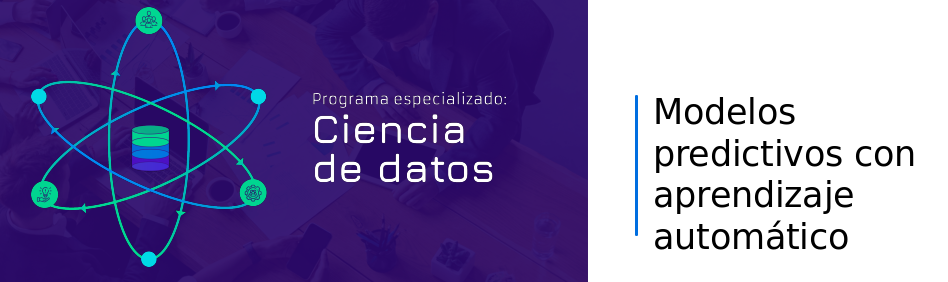